  0%|          | 0/2 [00:00<?, ?it/s]

Calculation for e to e started!


 50%|█████     | 1/2 [00:00<00:00,  1.17it/s]

Calculation for e to mu started!
Calculation for mu to mu started!


100%|██████████| 2/2 [00:01<00:00,  1.56it/s]


Probability calcualtions are done!
Plots are starting...


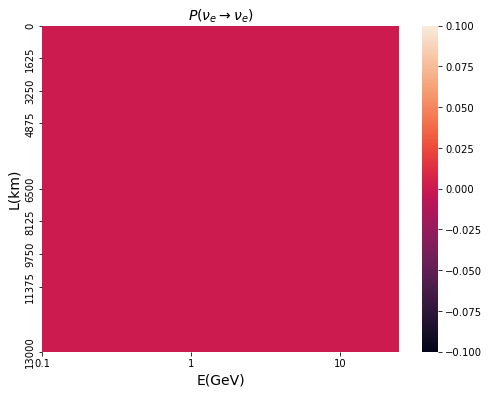

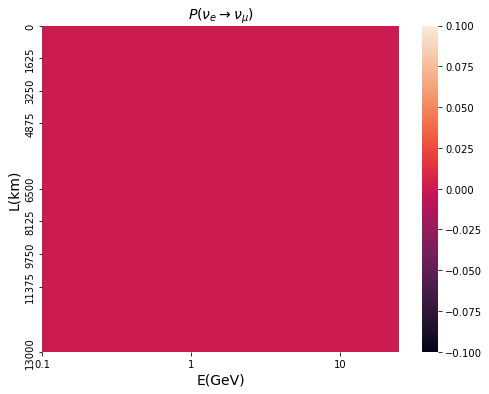

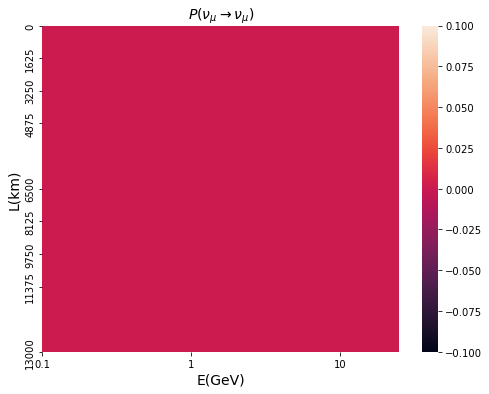

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sympy import *
import seaborn as sns
from Prob_calc import PMNS_param_matrix,flavor_to_index

This notebook is created in order to check different forms for the oscillation probabilities and it acts as a sanity check<br>
The equations were taken from the review paper Neutrino oscillations(191960.pdf)<br>
The equations that are going to be used are going to be cited with respect with this paper<br>


Values for the mixing angles $\theta_{ij}$ and for the $\delta_{CP}$ were taken from the web page of nu-fit.org including Super-Kamiokande, using the normal ordering hypothesis

In [2]:
theta_12= 33.45  #degrees
theta_23= 42.1   #degrees
theta_13= 8.62   #degrees

delta_cp= 90    #degrees

Dm_21   = 7.42*10**(-5) #eV^2

#Normal ordering
Dm_31_no= 2.51*10**(-3) #eV^2
Dm_32_no= 2.51*10**(-3) #eV^2

#Inverse ordering
Dm_31_io= -2.49*10**(-3) #eV^2
Dm_32_io= -2.49*10**(-3) #eV^2

In [3]:
def theta(i,j):
    if i==1 or j==1:
        if i==2 or j==2:
            return theta_12
        elif i==3 or j==3:
            return theta_13
    elif i==2 or j==2:
        if i==3 or j==3:
            return theta_23
    elif i==j:
        return ValueError("Not sure what to do with that!")

In [4]:
def D_mass(i,j,ordering="NO"): #for ordering: NO is normal ordering and IO inverse ordering
    if i==j:
        return ValueError("Have to find out what to do with that")
    elif i==1:
        if j==2:
            return -Dm_21
        elif j==3:
            if ordering=="NO":
                return -Dm_31_no
            else:
                return -Dm_31_io
    elif i==2 :
        if j==1:
            return Dm_21
        elif j==3:
            if ordering=="NO":
                return -Dm_32_no
            else:
                return -Dm_32_io
    elif i==3:
        if j==1:
            if ordering=="NO":
                return Dm_31_no
            else:
                return Dm_31_io
        elif j==2:
            if ordering=="NO":
                return Dm_32_no
            else:
                return Dm_32_io

First case tested eq.33

In [5]:
D_m_21=Symbol("D_m_21",real=True)
D_m_31=Symbol("D_m_31",real=True)
D_m_32=Symbol("D_m_32",real=True)

L=Symbol("L",real=True,positive=True)
E_nu=Symbol("E_nu",real=True)

In [6]:
def D_mass_param(i,j):
    if i==j:
        return ValueError("Probably 0 but not sure yet...")
    elif i==1:
        if j==2:
            return -D_m_21
        elif j==3:
            return -D_m_31
    elif i==2 :
        if j==1:
            return D_m_21
        elif j==3:
            return -D_m_32
    elif i==3:
        if j==1:
            return D_m_31
        elif j==2:            
            return D_m_32
            

In [7]:
e="e"
mu="mu"
tau="tau"

In [8]:
def norm(z):
    return sqrt(re(z)**2+im(z)**2)


In [9]:
def Prob_a_to_b_alt(a,b):
    index_a,index_b=flavor_to_index(a,b)

    fst_rhs=0
    U=PMNS_param_matrix()
    for i in [0,1,2]:
        fst_rhs+=(norm(U[index_b,i])**2)* norm(U[index_a,i])**2

    scd_rhs=0
    for i in [0,1,2]:
        for j in [0,1,2]:
            if i>j:
                scd_rhs+=U[index_b,i]*conjugate(U[index_a,i])*conjugate(U[index_b,j])*U[index_a,j]*cos((D_mass_param(i+1,j+1))*L/(2*E_nu))

    return fst_rhs+(2*re(scd_rhs))
    

In [10]:
def Prob_a_to_b_alt_anti(a,b):
    index_a,index_b=flavor_to_index(a,b)

    fst_rhs=0
    U=PMNS_param_matrix()
    for i in [0,1,2]:
        fst_rhs+=(norm(U[index_b,i])**2)* norm(U[index_a,i])**2

    scd_rhs=0
    for i in [0,1,2]:
        for j in [0,1,2]:
            if i>j:
                scd_rhs+=conjugate(U[index_b,i]*conjugate(U[index_a,i])*conjugate(U[index_b,j])*U[index_a,j]*cos((D_mass_param(i+1,j+1))*L/(2*E_nu)))

    return fst_rhs+(2*re(scd_rhs))

In [11]:
s_12=Symbol("s_12",real=True)
s_23=Symbol("s_23",real=True)
s_13=Symbol("s_13",real=True)

c_12=Symbol("c_12",real=True)
c_23=Symbol("c_23",real=True)
c_13=Symbol("c_13",real=True)

d_cp=Symbol("d_cp",real=True)

In [13]:
expression=Prob_a_to_b_alt(mu,mu).subs([(s_12,sin(theta(1,2))),(c_12,cos(theta(1,2))),(c_13,cos(theta(1,3))),(c_23,cos(theta(2,3))),(s_13,sin(theta(1,3))),(s_23,sin(theta(2,3))),(d_cp,delta_cp)])
expression_anti=Prob_a_to_b_alt_anti(mu,mu).subs([(s_12,sin(theta(1,2))),(c_12,cos(theta(1,2))),(c_13,cos(theta(1,3))),(c_23,cos(theta(2,3))),(s_13,sin(theta(1,3))),(s_23,sin(theta(2,3))),(d_cp,delta_cp)])

In [15]:
expression=expression.subs([(D_m_21,D_mass(2,1)),(D_m_32,D_mass(3,2)),(D_m_31,D_mass(3,1))])
expression_anti=expression_anti.subs([(D_m_21,D_mass(2,1)),(D_m_32,D_mass(3,2)),(D_m_31,D_mass(3,1))])

In [16]:
n=200
dist=np.linspace(0,13000,n)
eneg_range=np.logspace(-1,2,n)
Total_prob=np.zeros([n,n])
Total_prob_anti=np.zeros([n,n])

In [17]:
for i,l in enumerate(dist):
    eq_with_L=expression.subs([(L,l)])
    eq_with_L_anti=expression_anti.subs([(L,l)])
    for j,en in enumerate(eneg_range):
        Total_prob[i][j]=eq_with_L.subs([(E_nu,en)])
        Total_prob_anti[i][j]=eq_with_L_anti.subs([(E_nu,en)])        
    del eq_with_L

<AxesSubplot:>

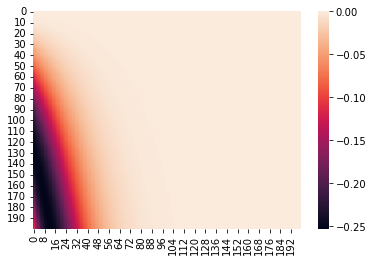

In [30]:
sns.heatmap(Total_prob-prob_nu_nmu)

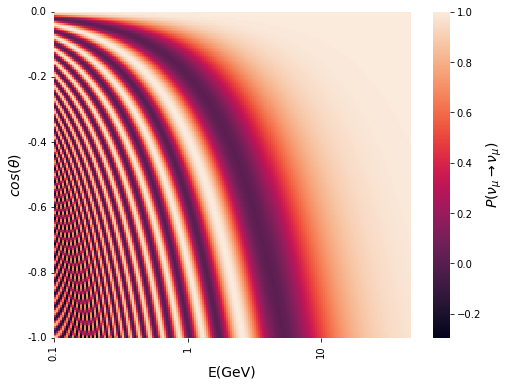

In [33]:
plt.figure(figsize=(8,6))
sns.heatmap(Total_prob,cbar=False)
sns.heatmap(Total_prob).figure.axes[-1].set_ylabel(r"$P(\nu_{\mu}\rightarrow\nu_{\mu})$",size=14) 
ymin,ymax=plt.gca().get_ylim()
xmin,xmax=plt.gca().get_xlim()  

custom_ticks_y=np.linspace(ymin,ymax,6,dtype=int)
custom_ticklabels_y=np.round(np.linspace(-1,0,6,dtype=float),2)
custom_ticks_x=np.linspace(xmin,xmax,4)
custom_ticklabels_x=[0.1,1,10,100]

plt.gca().set_xticks(custom_ticks_x)
plt.gca().set_xticklabels(custom_ticklabels_x)
plt.gca().set_yticks(custom_ticks_y)
plt.gca().set_yticklabels(custom_ticklabels_y)
plt.xlabel("E(GeV)",fontsize=14)
plt.ylabel(r"$cos(\theta)$",fontsize=14)

plt.xlim(right=int(n*0.89))
#plt.title(r"$P(\nu_{\mu}\rightarrow\nu_{\mu})$",fontsize=14) 
#plt.savefig("heatmaps/heatmaps_from_paper/HM_prob_mu_mu.pdf")
plt.show()

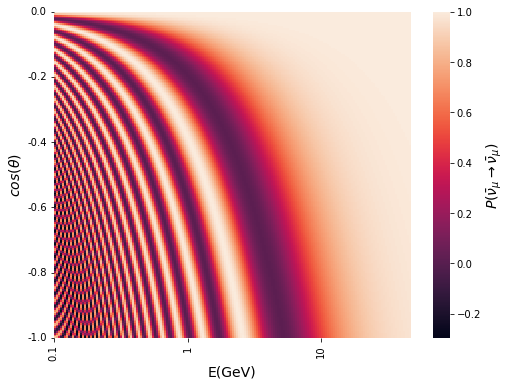

In [20]:

plt.figure(figsize=(8,6))
sns.heatmap(Total_prob_anti,cbar=False)
sns.heatmap(Total_prob_anti).figure.axes[-1].set_ylabel(r"$P(\bar{\nu}_{\mu}\rightarrow\bar{\nu}_{\mu})$",size=14) 
ymin,ymax=plt.gca().get_ylim()
xmin,xmax=plt.gca().get_xlim()  

custom_ticks_y=np.linspace(ymin,ymax,6,dtype=int)
custom_ticklabels_y=np.round(np.linspace(-1,0,6,dtype=float),2)
custom_ticks_x=np.linspace(xmin,xmax,4)
custom_ticklabels_x=[0.1,1,10,100]

plt.gca().set_xticks(custom_ticks_x)
plt.gca().set_xticklabels(custom_ticklabels_x)
plt.gca().set_yticks(custom_ticks_y)
plt.gca().set_yticklabels(custom_ticklabels_y)
plt.xlabel("E(GeV)",fontsize=14)
plt.ylabel(r"$cos(\theta)$",fontsize=14)

plt.xlim(right=int(n*0.89))
#plt.title(r"$P(\nu_{\mu}\rightarrow\nu_{\mu})$",fontsize=14) 
#plt.savefig("heatmaps/heatmaps_from_paper/HM_prob_mu_mu.pdf")
plt.show()

#### Here I am hardcoding eq.39-46 from 191960.pdf

In [21]:
def deg_to_rad(theta):
    return (theta/180)*np.pi

def rad_to_deg(theta):
    return (theta/np.pi)*180

In [22]:
delta_cp=np.pi/2

In [24]:
J=(1/8)*np.sin(2*deg_to_rad(theta_12))*np.sin(2*deg_to_rad(theta_23))*np.sin(2*deg_to_rad(theta_13))*np.cos(deg_to_rad(theta_13))*np.sin(delta_cp)

In [25]:
P_cp=8*J*sin((D_mass(2,1)*L)/(4*E_nu))*sin((D_mass(3,1)*L)/(4*E_nu))**2

In [26]:
S_23=sin((D_mass(3,2)*L)/(4*E_nu))**2
S_12=sin((D_mass(2,1)*L)/(4*E_nu))**2

In [27]:
P_ne_nmu=(np.sin(theta_23)**2)*(np.sin(2*theta_13)**2)*S_23+(np.cos(theta_23)**2)*(np.sin(2*theta_12)**2)*S_12-P_cp
P_ne_ne=1-(np.sin(2*theta_13)**2)*S_23-(np.cos(theta_13)**4)*(np.sin(2*theta_12)**2)*S_12
P_nmu_nmu=1-(4*(np.cos(theta_13)**2)*(np.sin(theta_23)**2)*(1-(np.cos(theta_13)**2)*(np.sin(theta_23)**2))*S_23)-((np.cos(theta_23)**2)*(np.sin(2*theta_12)**2)*S_12)

In [28]:
n=200
dist=np.linspace(0,13000,n)
eneg_range=np.logspace(-1,2,n)

prob_ne_ne=np.zeros([n,n])
prob_ne_nmu=np.zeros([n,n])
prob_nu_nmu=np.zeros([n,n])


for i,l in enumerate(dist):
    eq_ee=P_ne_ne.subs([(L,l)])
    eq_em=P_ne_nmu.subs([(L,l)])
    eq_mm=P_nmu_nmu.subs([(L,l)])
    for j,en in enumerate(eneg_range):
        prob_ne_ne[i][j]=eq_ee.subs([(E_nu,en)])
        prob_ne_nmu[i][j]=eq_em.subs([(E_nu,en)])
        prob_nu_nmu[i][j]=eq_mm.subs([(E_nu,en)])
    del eq_ee,eq_mm,eq_em

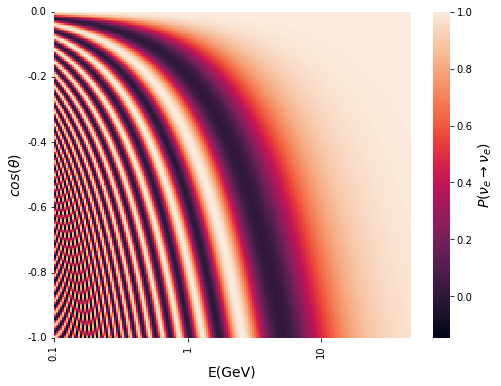

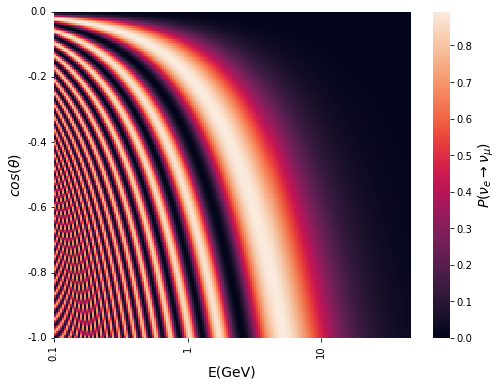

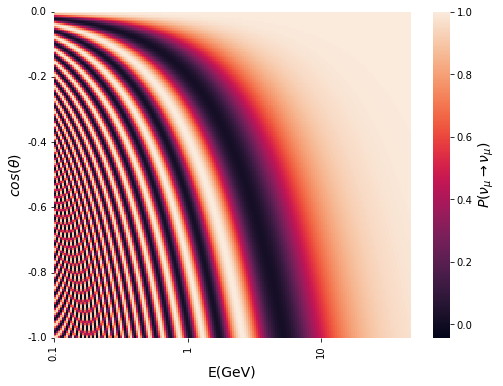

In [29]:
plt.figure(figsize=(8,6))
sns.heatmap(prob_ne_ne,cbar=False)
sns.heatmap(prob_ne_ne).figure.axes[-1].set_ylabel(r"$P(\nu_{e}\rightarrow\nu_{e})$",size=14) 
ymin,ymax=plt.gca().get_ylim()
xmin,xmax=plt.gca().get_xlim()  

custom_ticks_y=np.linspace(ymin,ymax,6,dtype=int)
custom_ticklabels_y=np.round(np.linspace(-1,0,6,dtype=float),2)
custom_ticks_x=np.linspace(xmin,xmax,4)
custom_ticklabels_x=[0.1,1,10,100]

plt.gca().set_xticks(custom_ticks_x)
plt.gca().set_xticklabels(custom_ticklabels_x)
plt.gca().set_yticks(custom_ticks_y)
plt.gca().set_yticklabels(custom_ticklabels_y)
plt.xlabel("E(GeV)",fontsize=14)
plt.ylabel(r"$cos(\theta)$",fontsize=14)

plt.xlim(right=int(n*0.89))
#plt.title(r"$P(\nu_{e}\rightarrow\nu_{e})$",fontsize=14) 
plt.savefig("heatmaps/heatmaps_from_paper/HM_prob_e_e.pdf")
plt.show()

plt.figure(figsize=(8,6))
sns.heatmap(prob_ne_nmu,cbar=False)
sns.heatmap(prob_ne_nmu).figure.axes[-1].set_ylabel(r"$P(\nu_{e}\rightarrow\nu_{\mu})$",size=14) 
ymin,ymax=plt.gca().get_ylim()
xmin,xmax=plt.gca().get_xlim()  

custom_ticks_y=np.linspace(ymin,ymax,6,dtype=int)
custom_ticklabels_y=np.round(np.linspace(-1,0,6,dtype=float),2)
custom_ticks_x=np.linspace(xmin,xmax,4)
custom_ticklabels_x=[0.1,1,10,100]

plt.gca().set_xticks(custom_ticks_x)
plt.gca().set_xticklabels(custom_ticklabels_x)
plt.gca().set_yticks(custom_ticks_y)
plt.gca().set_yticklabels(custom_ticklabels_y)
plt.xlabel("E(GeV)",fontsize=14)
plt.ylabel(r"$cos(\theta)$",fontsize=14)

plt.xlim(right=int(n*0.89))
#plt.title(r"$P(\nu_{e}\rightarrow\nu_{\mu})$",fontsize=14) 
plt.savefig("heatmaps/heatmaps_from_paper/HM_prob_e_mu.pdf")
plt.show()

plt.figure(figsize=(8,6))
sns.heatmap(prob_nu_nmu,cbar=False)
sns.heatmap(prob_nu_nmu).figure.axes[-1].set_ylabel(r"$P(\nu_{\mu}\rightarrow\nu_{\mu})$",size=14) 
ymin,ymax=plt.gca().get_ylim()
xmin,xmax=plt.gca().get_xlim()  

custom_ticks_y=np.linspace(ymin,ymax,6,dtype=int)
custom_ticklabels_y=np.round(np.linspace(-1,0,6,dtype=float),2)
custom_ticks_x=np.linspace(xmin,xmax,4)
custom_ticklabels_x=[0.1,1,10,100]

plt.gca().set_xticks(custom_ticks_x)
plt.gca().set_xticklabels(custom_ticklabels_x)
plt.gca().set_yticks(custom_ticks_y)
plt.gca().set_yticklabels(custom_ticklabels_y)
plt.xlabel("E(GeV)",fontsize=14)
plt.ylabel(r"$cos(\theta)$",fontsize=14)

plt.xlim(right=int(n*0.89))
#plt.title(r"$P(\nu_{\mu}\rightarrow\nu_{\mu})$",fontsize=14) 
plt.savefig("heatmaps/heatmaps_from_paper/HM_prob_mu_mu.pdf")
plt.show()

